# Numerical Methods for Initial Value Problems
Sean Wade

In [4]:
%matplotlib inline

In [41]:
from __future__ import division
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

### Problem 1

In [19]:
def euler(func, y0, a, b, h, display=True):
    n = int((b-a)/h) + 1
    x = np.linspace(a,b,n)
    y = np.zeros(n)
    y[0] = y0
    for i in xrange(n-1):
        y[i+1] = y[i] + h * func(x[i], y[i]) 
    if display is True:
        plt.plot(x, y, label=h)
    return y

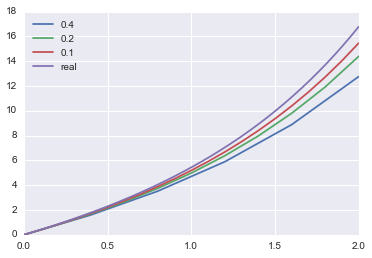

In [42]:
func = lambda x,y : y - 2*x + 4
y0, a, b = 0, 0, 2
h_list = np.array([0.4, 0.2, 0.1])
for h in h_list:
    euler(func, y0, a, b, h)
    
# calc true answer
x = np.linspace(a,b,100)
answer = lambda x : -2 + 2*x + 2*np.exp(x)
plt.plot(x, answer(x), label='real')
plt.legend(loc=2)
plt.show()

### Problem 2

In [43]:
def midpoint(func, y0, a, b, h, display=True):
    n = int((b-a)/h) + 1
    x = np.linspace(a, b, n)
    y = np.zeros(n)
    y[0] = y0
    for i in xrange(n-1):
        y[i+1] = y[i] + h * func(x[i] + h/2., y[i] + h/.2 * func(x[i], y[i]))
        
    if display is True:
        plt.plot(x, y, label='Midpoint with %d' % h)
    return y

In [99]:
def RK4(func, y0, a, b, h, display=True):
    n = int((b-a)/h) + 1
    x = np.linspace(a,b,n)
    if isinstance(y0, (np.ndarray)):
        y = np.zeros((n,len(y0)))
    else:
        y = np.zeros(n)
    y[0] = y0
    for i in xrange(n-1):
        k1 = func(x[i], y[i])
        k2 = func(x[i] + (h/2.), y[i] + (h/2.)*k1)
        k3 = func(x[i] + (h/2.), y[i] + (h/2.)*k2)
        k4 = func(x[i+1], y[i] + h*k3)
        y[i+1] = y[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    
    if display is True:
        print x.shape, y.shape
        plt.plot(x, y, label='RK4 with %d' % h)
    return y

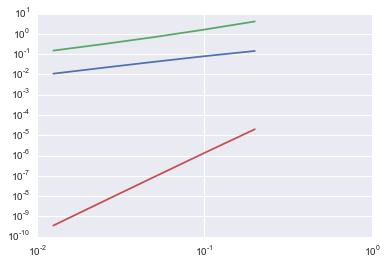

In [63]:
func = lambda x,y : y - 2*x + 4
answer = lambda x : -2 + 2*x + 2*np.exp(x)
y0, a, b = 0, 0, 2
h_list = np.array([.2, .1, .05, .025, .0125])
sol = answer(2)

euler_error = np.zeros(5)
midpoint_error = np.zeros(5)
rk4_error = np.zeros(5)

for i, h in enumerate(h_list):
    euler_error[i] = np.abs(euler(func, y0, a, b, h, False)[-1] - sol)/sol
    midpoint_error[i] = np.abs(midpoint(func, y0, a, b, h, False)[-1] - sol)/sol
    rk4_error[i] = np.abs(RK4_n(func, y0, a, b, h, False)[-1] - sol)/sol

plt.loglog(h_list, euler_error)
plt.loglog(h_list, midpoint_error)
plt.loglog(h_list, rk4_error)
plt.show()

### Problem 3

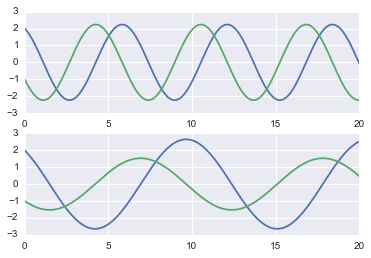

In [75]:
z = lambda x,y: np.array([y[1],-1*float(y[0])])
z2 = lambda x,y: np.array([y[1],-1/3.*float(y[0])])

a, b = 0, 20
y0 = np.array([2,-1])
h = 0.01

plt.subplot(211)
RK4(z, y0, a, b, h)
plt.subplot(212)
RK4(z2, y0, a, b, h)
plt.show()

### Problem 4

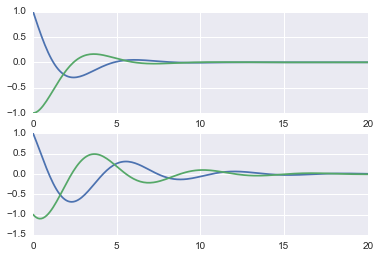

---------------------------------------------
gamma=.5: ~2.80845603631e-05
   Relative error of: 3.11376250581e-05
---------------------------------------------
gamma=1: ~2.80845603631e-05
   Relative error of: 3.24185909591e-05
---------------------------------------------


In [94]:
z1 = lambda x, y : np.array([y[1], -1.* y[1] - y[0]])
z2 = lambda x, y : np.array([y[1], -0.5* y[1] - y[0]])

a, b = 0, 20
y0 = np.array([1,-1])
h = .1

plt.subplot(211)
approx1 = RK4(z1, y0, a, b, h)
plt.subplot(212)
approx2 = RK4(z2, y0, a, b, h)
plt.show()
    
a1 = approx1[-1][0]
a2 = approx2[-1][0]

def relative1(approximation):
    t = 0.003290516135070259013581111877
    return np.abs(approximation - t) / np.abs(t)

def relative2(approximation):
    t = 0.000028083649930759203640138098
    return np.abs(approximation - t) / np.abs(t)

print '-'*45
print 'gamma=.5: ~{}'.format(a1)
print '   Relative error of: {}'.format(relative1(a2))
print '-'*45
print 'gamma=1: ~{}'.format(a1)
print '   Relative error of: {}'.format(relative2(a1))
print '-'*45

### Problem 5

(401,) (401, 2)
(401,) (401, 2)
(401,) (401, 2)


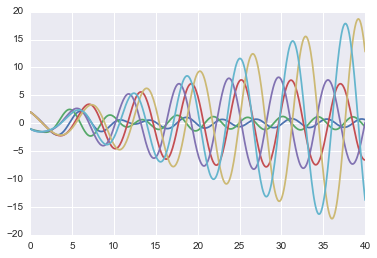

In [100]:
z = lambda x, y: np.array([y[1], np.cos(var[1]*x) - .5*var[0]*y[1] - y[0]])
a, b = 0, 40
y0 = np.array([2.,-1.])
h = 0.1
    
vairables = [[0.5,1.5],[0.1,1.1],[0,1]]
for var in vairables:
    RK4(z, y0, a, b, h)
plt.show()